In [54]:
# pip install yfinance

In [55]:
import yfinance as yf

In [4]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [5]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.846546,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.922838,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.772251,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.280355,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.272379,2942055


In [7]:
google_data.shape

(2523, 6)

In [8]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2.523000e+03
mean,71.870065,72.638048,71.158162,71.916059,71.916059,3.219981e+07
std,38.597088,39.056505,38.196102,38.629595,38.629595,1.590481e+07
min,24.664783,24.730902,24.311253,24.560070,24.560070,1.584340e+05
25%,38.657001,38.917000,38.413525,38.605749,38.605749,2.243995e+07
50%,58.391499,58.864750,57.865002,58.403999,58.403999,2.828820e+07
75%,104.680252,106.130001,103.555500,104.920002,104.920002,3.678500e+07
max,155.149994,157.000000,154.132004,156.500000,156.500000,2.232980e+08


In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2523 entries, 2014-03-27 to 2024-04-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2523 non-null   float64
 1   High       2523 non-null   float64
 2   Low        2523 non-null   float64
 3   Close      2523 non-null   float64
 4   Adj Close  2523 non-null   float64
 5   Volume     2523 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.0 KB


In [10]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

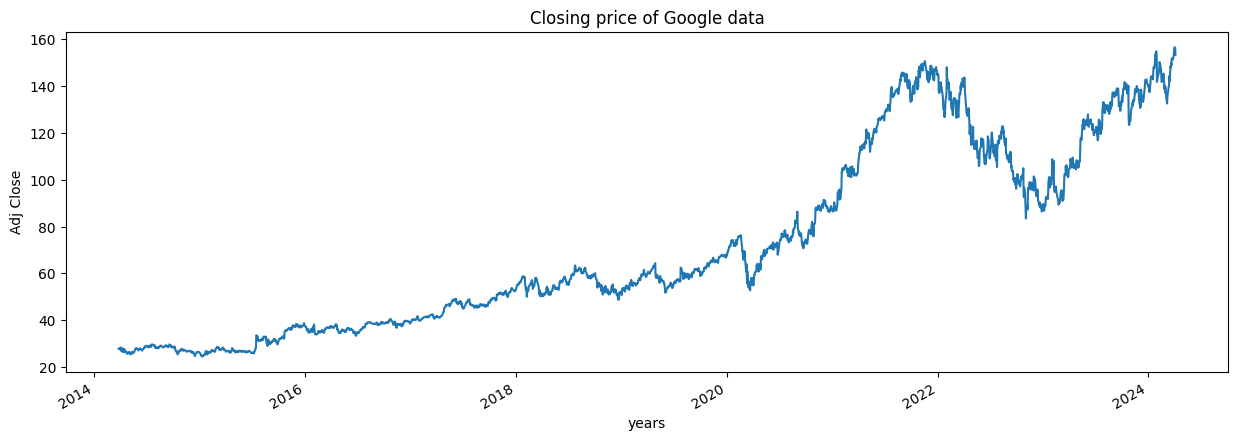

In [12]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [14]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

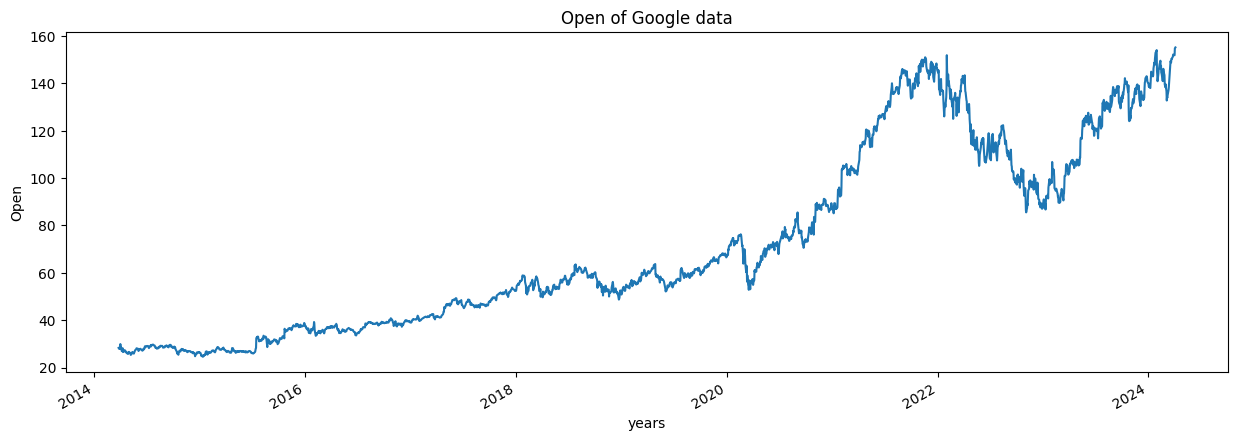

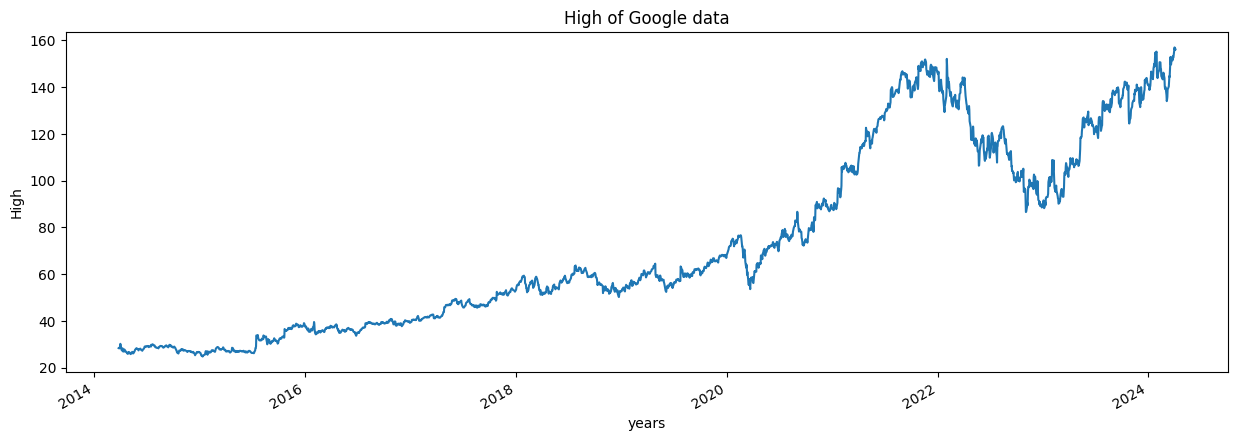

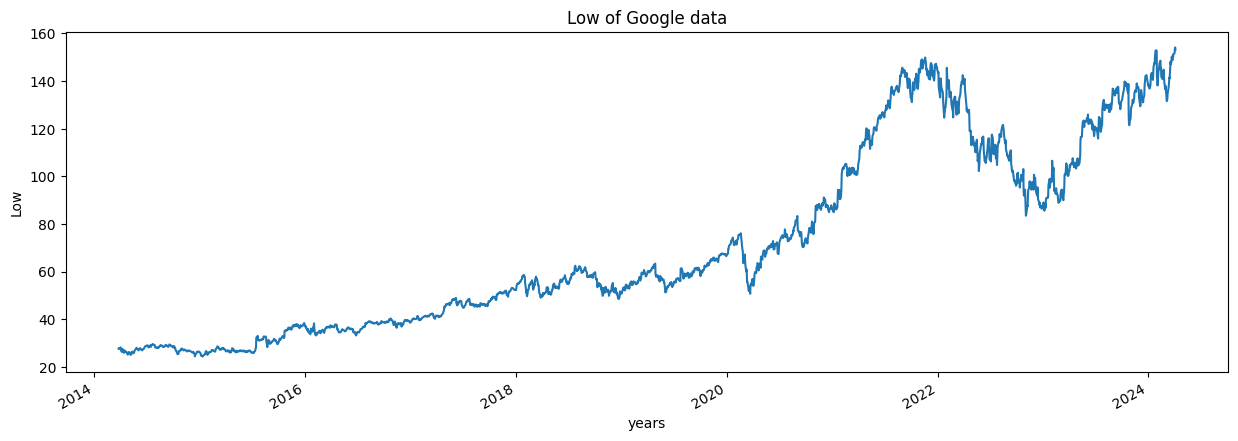

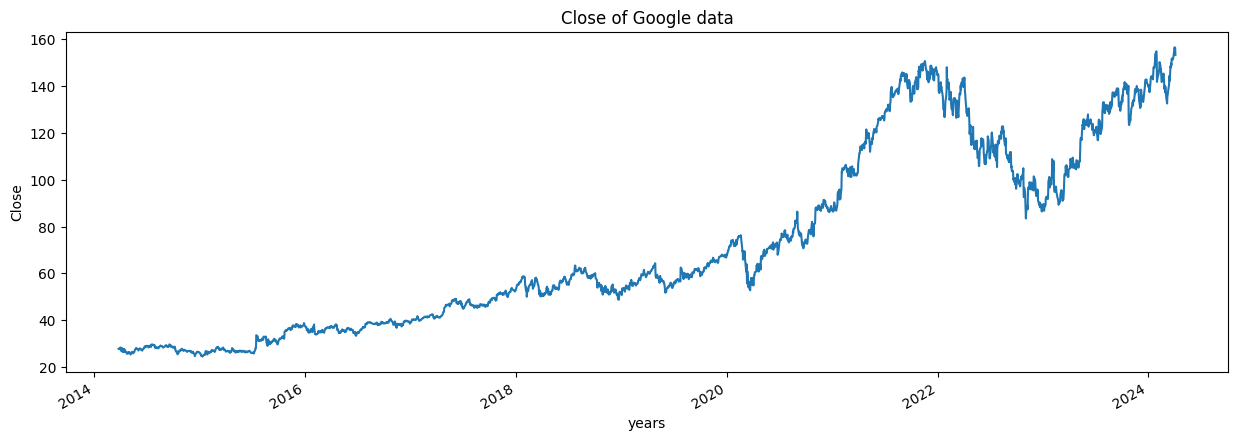

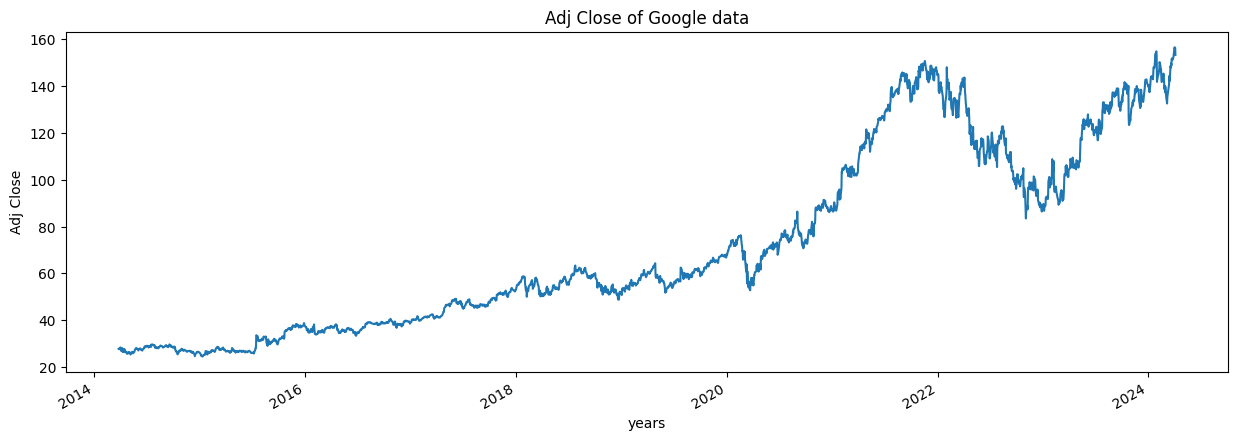

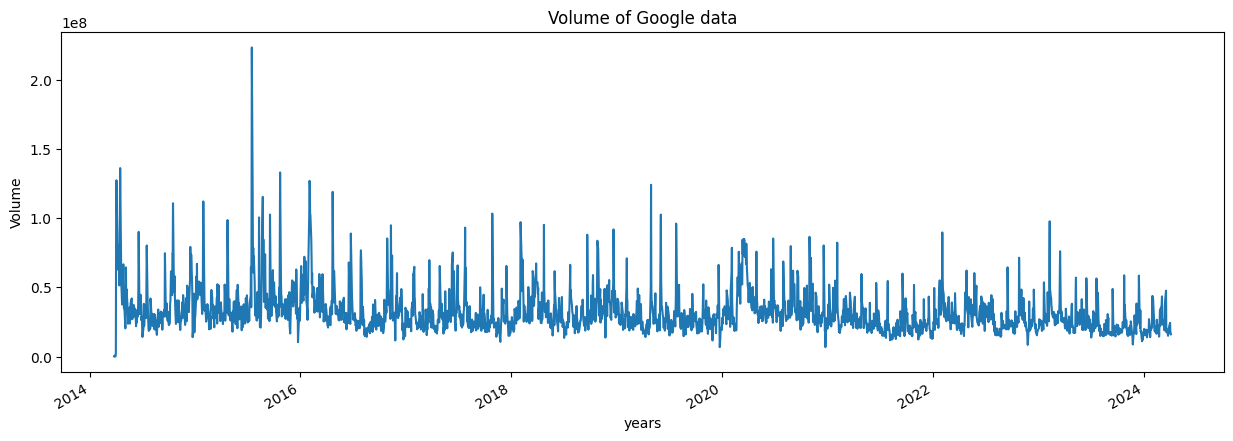

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 194
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 65


In [21]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [22]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24    27.43139
Name: MA_for_250_days, dtype: float64

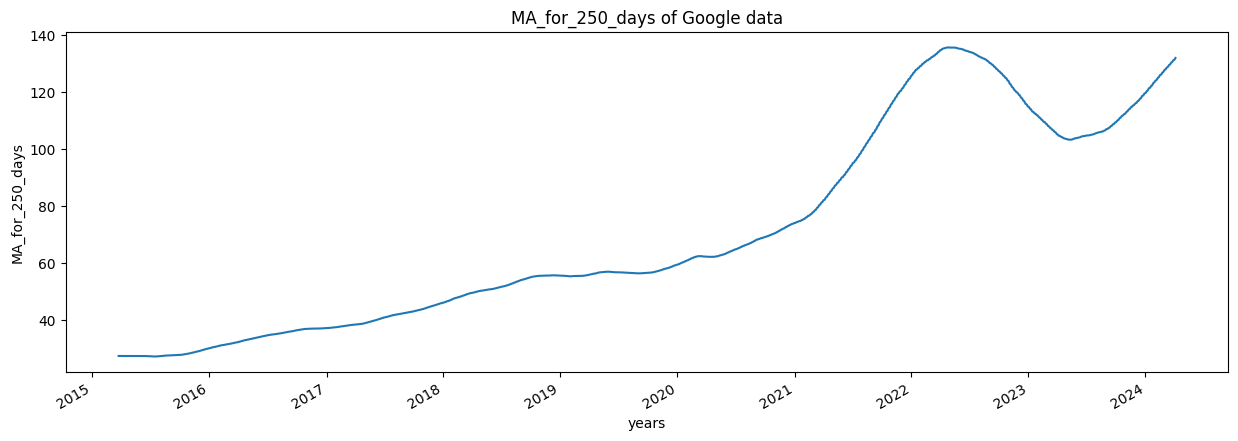

In [23]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

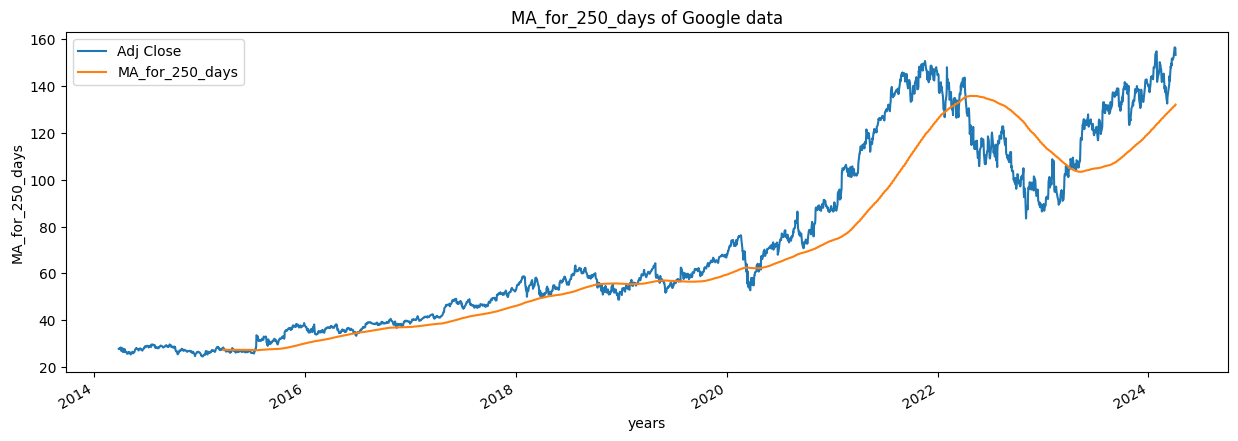

In [24]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

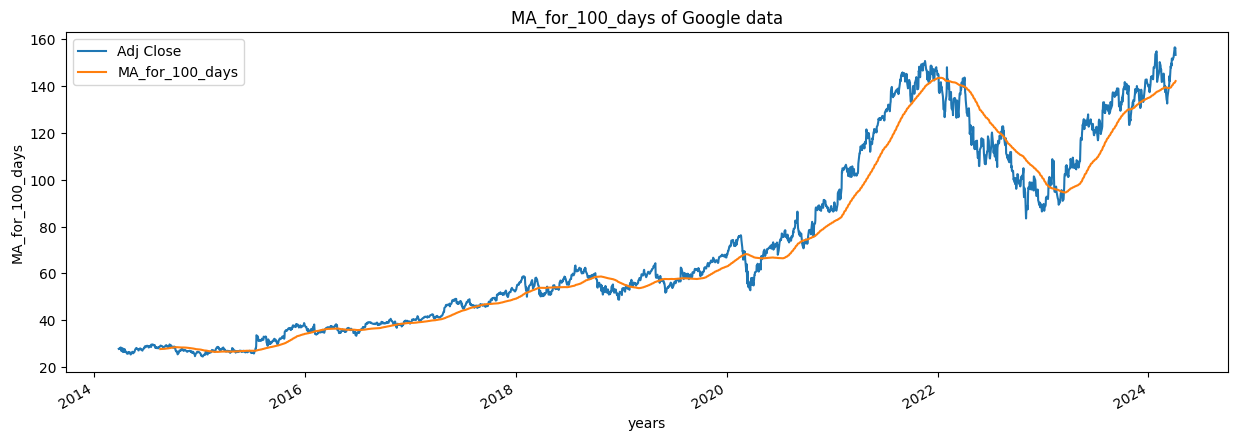

In [25]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

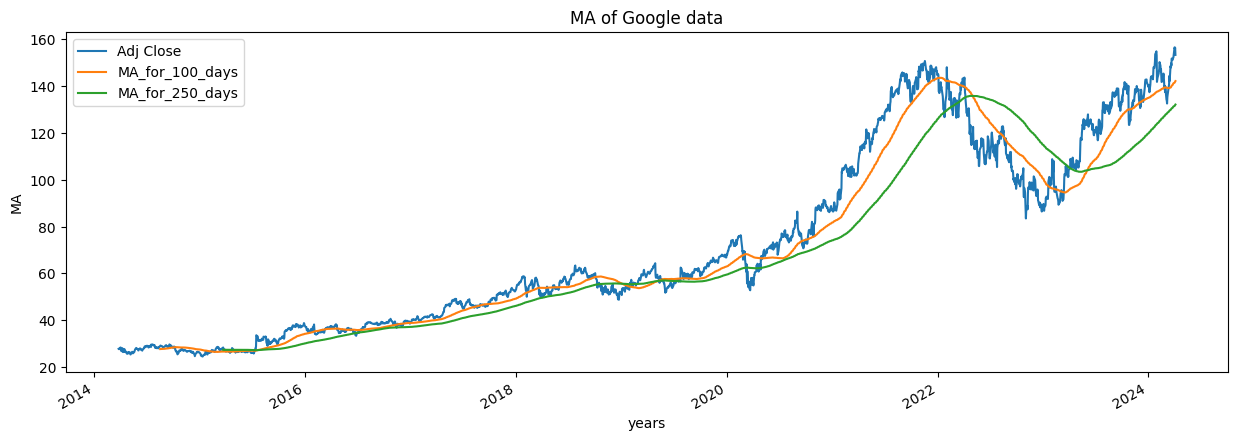

In [26]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [27]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-03-27,27.846546,NaN
2014-03-28,27.922838,0.002740
2014-03-31,27.772251,-0.005393
2014-04-01,28.280355,0.018295
2014-04-02,28.272379,-0.000282


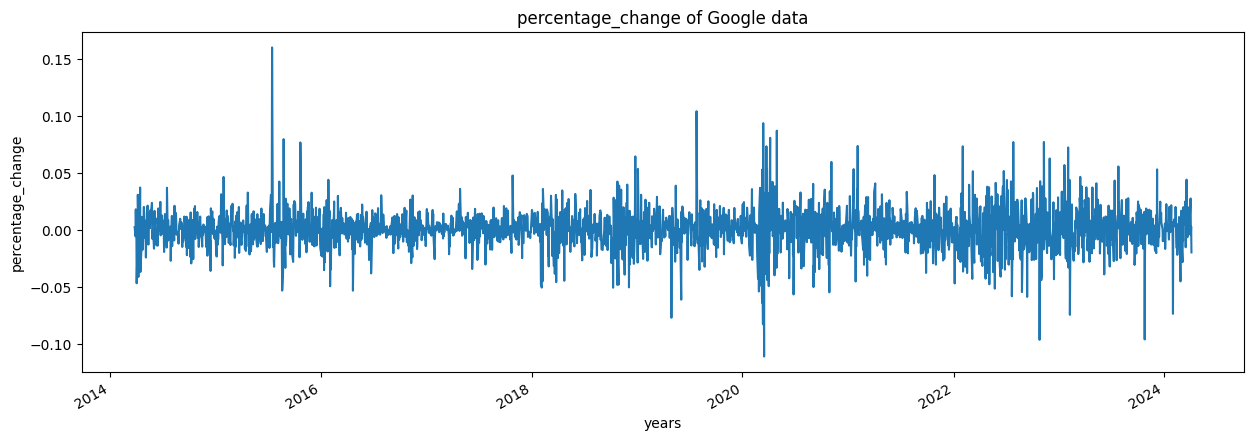

In [28]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [29]:
Adj_close_price = google_data[['Adj Close']]

In [30]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([156.5]), array([24.56007004]))

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.02490888],
       [0.02548712],
       [0.02434578],
       ...,
       [0.99522506],
       [0.99901467],
       [0.97582231]])

In [32]:
len(scaled_data)

2523

In [33]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [34]:
x_data[0],y_data[0]

(array([[0.02490888],
        [0.02548712],
        [0.02434578],
        [0.02819681],
        [0.02813636],
        [0.02917185],
        [0.01911912],
        [0.01723328],
        [0.02356349],
        [0.0270555 ],
        [0.01829146],
        [0.01437996],
        [0.01510558],
        [0.01658703],
        [0.02418328],
        [0.01645853],
        [0.01363167],
        [0.01597102],
        [0.01299676],
        [0.01232406],
        [0.00893031],
        [0.00929691],
        [0.01328398],
        [0.01289095],
        [0.0146634 ],
        [0.01337091],
        [0.01332556],
        [0.00853728],
        [0.00657963],
        [0.00697268],
        [0.00989402],
        [0.01412297],
        [0.01532099],
        [0.01288717],
        [0.01036642],
        [0.01061207],
        [0.01372238],
        [0.01406629],
        [0.01753185],
        [0.01984473],
        [0.02273205],
        [0.02773953],
        [0.0261258 ],
        [0.02552113],
        [0.02544933],
        [0

In [35]:

int(len(x_data)*0.7)

1696

In [36]:
4908-100-int(len(x_data)*0.7)

3112

In [37]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1696, 100, 1)
(1696, 1)
(727, 100, 1)
(727, 1)


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [40]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
1696/1696 ━━━━━━━━━━━━━━━━━━━━ 93s 48ms/step - loss: 0.0016
Epoch 2/2
1696/1696 ━━━━━━━━━━━━━━━━━━━━ 102s 60ms/step - loss: 3.3655e-04


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [44]:
predictions = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


In [45]:
predictions

array([[0.74898803],
       [0.7514201 ],
       [0.7574457 ],
       [0.7603896 ],
       [0.76213104],
       [0.76890844],
       [0.7731501 ],
       [0.7832368 ],
       [0.79164326],
       [0.7999012 ],
       [0.8010466 ],
       [0.800934  ],
       [0.80279   ],
       [0.80351055],
       [0.8016675 ],
       [0.8061218 ],
       [0.81284326],
       [0.8204052 ],
       [0.82689756],
       [0.834948  ],
       [0.8396483 ],
       [0.8436078 ],
       [0.845128  ],
       [0.8446238 ],
       [0.845606  ],
       [0.84463805],
       [0.8460365 ],
       [0.8491881 ],
       [0.85050255],
       [0.8531985 ],
       [0.85462296],
       [0.8548275 ],
       [0.852517  ],
       [0.8484713 ],
       [0.84815645],
       [0.8552823 ],
       [0.86495817],
       [0.87297785],
       [0.87534785],
       [0.87629235],
       [0.8789892 ],
       [0.882353  ],
       [0.8877411 ],
       [0.8897063 ],
       [0.89173347],
       [0.88613445],
       [0.8854731 ],
       [0.890

In [46]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[123.3815  ],
       [123.702385],
       [124.4974  ],
       [124.885826],
       [125.115585],
       [126.009796],
       [126.569435],
       [127.900276],
       [129.00943 ],
       [130.09897 ],
       [130.2501  ],
       [130.23524 ],
       [130.48012 ],
       [130.5752  ],
       [130.33203 ],
       [130.91972 ],
       [131.80655 ],
       [132.80428 ],
       [133.66087 ],
       [134.72305 ],
       [135.3432  ],
       [135.86563 ],
       [136.0662  ],
       [135.99968 ],
       [136.12927 ],
       [136.00156 ],
       [136.18607 ],
       [136.6019  ],
       [136.77531 ],
       [137.13103 ],
       [137.31897 ],
       [137.34596 ],
       [137.0411  ],
       [136.50732 ],
       [136.46577 ],
       [137.40596 ],
       [138.6826  ],
       [139.7407  ],
       [140.0534  ],
       [140.17802 ],
       [140.53386 ],
       [140.97766 ],
       [141.68857 ],
       [141.94786 ],
       [142.21532 ],
       [141.4766  ],
       [141.38933 ],
       [142.0

In [47]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[115.80799866],
       [116.07050323],
       [115.17150116],
       [115.4355011 ],
       [117.80449677],
       [117.25499725],
       [120.33350372],
       [120.45349884],
       [121.67649841],
       [120.12550354],
       [120.57800293],
       [121.4905014 ],
       [121.06400299],
       [120.23049927],
       [122.58799744],
       [123.30449677],
       [124.14250183],
       [124.56999969],
       [126.08000183],
       [125.69650269],
       [126.35199738],
       [126.03299713],
       [125.69650269],
       [126.3710022 ],
       [125.56749725],
       [126.45500183],
       [126.99949646],
       [126.46150208],
       [127.28199768],
       [126.99500275],
       [126.81950378],
       [126.01850128],
       [125.31600189],
       [126.36849976],
       [128.71899414],
       [129.77099609],
       [130.07749939],
       [129.17700195],
       [129.57449341],
       [130.56399536],
       [130.99450684],
       [132.08250427],
       [131.26649475],
       [131

In [48]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [49]:
rmse

10.614754084477655

In [50]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2021-05-14,115.807999,123.381500
2021-05-17,116.070503,123.702385
2021-05-18,115.171501,124.497398
2021-05-19,115.435501,124.885826
2021-05-20,117.804497,125.115585


<Figure size 640x480 with 0 Axes>

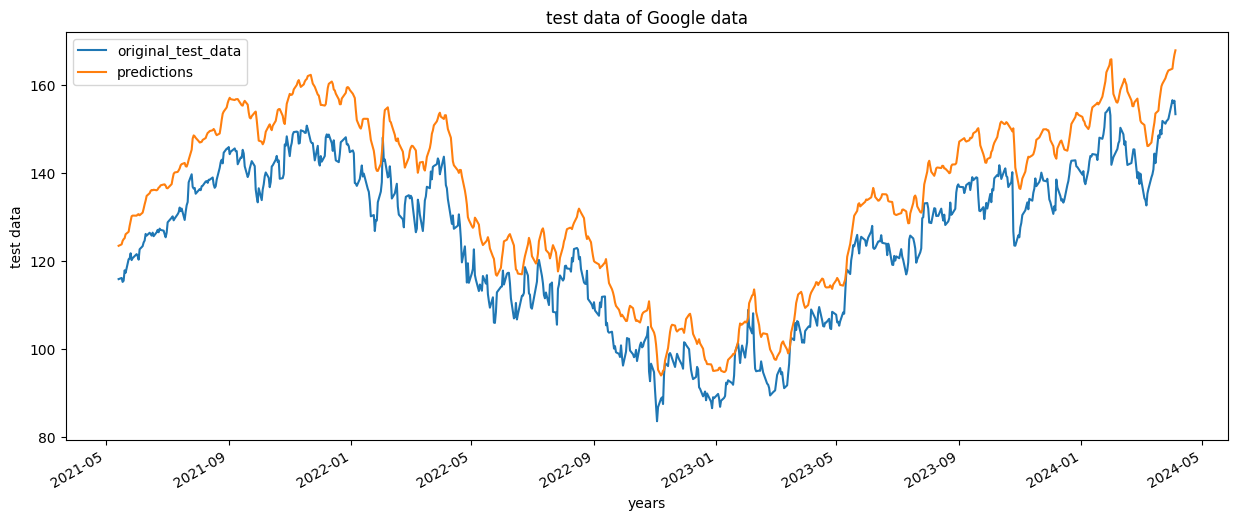

In [51]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

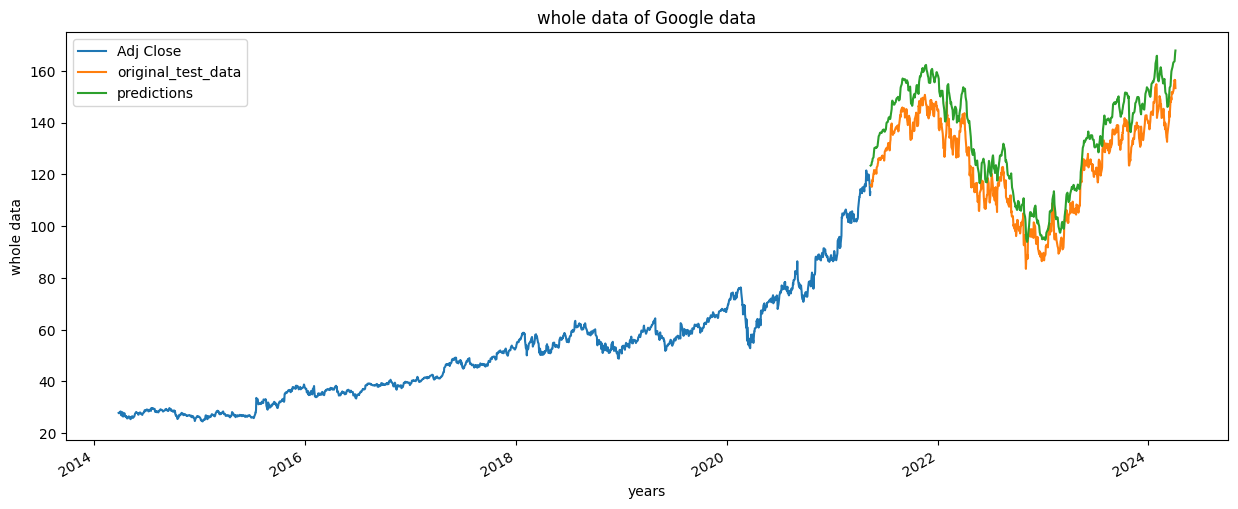

In [52]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [53]:
model.save("Latest_stock_price_model.keras")